In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


# TASK-1


## 1. Dataset Preparation 

In [ ]:
import pandas as pd


# Load the dataset with userid,version,sum_gamerounds,retention_1,retention_7
df = pd.read_csv("./cookie_cats.csv")
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")

df.head()

Dataset loaded with 90189 rows and 5 columns.


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [34]:
df.shape

(90189, 5)

## 2. Remove any rows with null values

In [35]:
selected_columns = df[["version", "retention_1", "retention_7"]]
selected_columns.shape

(90189, 3)

In [36]:

# Check for null values
print("Missing values before cleaning:")
print(selected_columns.isnull().sum())

# Remove rows with null values in the selected columns
df = df.dropna(subset=["version", "retention_1", "retention_7"])

print("\nRows with null values removed. Updated dataset shape:")
print(df.shape)
            
print("\nMissing values after cleaning:")
print(selected_columns.isnull().sum())

Missing values before cleaning:
version        0
retention_1    0
retention_7    0
dtype: int64

Rows with null values removed. Updated dataset shape:
(90189, 5)

Missing values after cleaning:
version        0
retention_1    0
retention_7    0
dtype: int64


## 2.Encode the values

In [37]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to hold encoded data
df_enc = df.copy()

# Initialize separate LabelEncoders for each column
label_encoder_1 = LabelEncoder()
label_encoder_7 = LabelEncoder()

# Encode each column separately
df_enc['retention_1'] = label_encoder_1.fit_transform(df['retention_1'])
df_enc['retention_7'] = label_encoder_7.fit_transform(df['retention_7'])

print("Encoding completed. Sample data:")
print(df_enc[['retention_1', 'retention_7']].head())


Encoding completed. Sample data:
   retention_1  retention_7
0            0            0
1            1            0
2            1            0
3            0            0
4            1            1


## 3.Group Separation 

In [46]:
# Filter for gate_30, gate_40 only (excluding Side if present)
grp_ab_df = df_enc[df_enc['version'].isin(['gate_30', 'gate_40'])]

group_a = grp_ab_df[grp_ab_df['version'] == 'gate_30']
group_b = grp_ab_df[grp_ab_df['version'] == 'gate_40']

print(f"Group A size: {len(group_a)}")
print(f"Group B size: {len(group_b)}")


Group A size: 44700
Group B size: 45489


## 4. Hypothesis Testing (z-test)

In [58]:
# Calculate success counts (clicks) for each group
retention_1_a = group_a['retention_1'].sum()
retention_1_b = group_b['retention_1'].sum()

# Total observations in each group
nobs_1_a = len(group_a)
nobs_1_b = len(group_b)

# Print the click-through rates
ctr_a = retention_1_a / nobs_1_a * 100
ctr_b = retention_1_b / nobs_1_b * 100
print(f"Retention_1 rate for Group A: {ctr_a:.2f}%")
print(f"Retention_1 rate for Group B: {ctr_b:.2f}%")


# Calculate success counts (clicks) for each group
retention_7_a = group_a['retention_7'].sum()
retention_7_b = group_b['retention_7'].sum()

# Total observations in each group
nobs_7_a = len(group_a)
nobs_7_b = len(group_b)

# Print the click-through rates
ctr_a = retention_7_a / nobs_7_a * 100
ctr_b = retention_7_b / nobs_7_b * 100
print(f"Retention_7 rate for Group A: {ctr_a:.2f}%")
print(f"Retention_7 rate for Group B: {ctr_b:.2f}%")


Retention_1 rate for Group A: 44.82%
Retention_1 rate for Group B: 44.23%
Retention_7 rate for Group A: 19.02%
Retention_7 rate for Group B: 18.20%


## 5. Report the z-score and p-value for each test.

In [59]:
from statsmodels.stats.proportion import proportions_ztest


# Z-test for retention_1
zstat_1, pval_1 = proportions_ztest([retention_1_a, retention_1_b], [nobs_1_a, nobs_1_b])
zstat_7, pval_7 = proportions_ztest([retention_7_a, retention_7_b], [nobs_7_a, nobs_7_b])


print(f"Retention_1 z = {zstat_1:.2f}, p = {pval_1:.4f}")
print(f"Retention_7 z = {zstat_7:.2f}, p = {pval_7:.4f}")


Retention_1 z = 1.78, p = 0.0744
Retention_7 z = 3.16, p = 0.0016


## 6. Analysis & Interpretation 

In [61]:
# Interpreting the results

def interpret_results(zstat, pval, alpha=0.05):
    if pval < alpha:
        print(f"The p-value ({pval:.4f}) is less than the significance level ({alpha}).")
        print("Therefore, we reject the null hypothesis.")
        print("CONCLUSION: There is a statistically significant difference in retention rates between ads positioned")
        print("at the top versus the bottom of the webpage.")
        
        if zstat > 0:
            print(f"Top positioned ads have a higher retention rate than bottom positioned ads.")
        else:
            print(f"Bottom positioned ads have a higher retention rate than top positioned ads.")
    else:
        print(f"The p-value ({pval:.4f}) is greater than the significance level ({alpha}).")
        print("Therefore, we fail to reject the null hypothesis.")
        print("CONCLUSION: There is no statistically significant difference in retention rates between ads positioned")
        print("at the top versus the bottom of the webpage.")

# Interpret results for retention_1 
print("\nRetention_1 Results:")
interpret_results(zstat_1, pval_1)

# Interpret results for retention_7
print("\nRetention_7 Results:")
interpret_results(zstat_7, pval_7)


Retention_1 Results:
The p-value (0.0744) is greater than the significance level (0.05).
Therefore, we fail to reject the null hypothesis.
CONCLUSION: There is no statistically significant difference in retention rates between ads positioned
at the top versus the bottom of the webpage.

Retention_7 Results:
The p-value (0.0016) is less than the significance level (0.05).
Therefore, we reject the null hypothesis.
CONCLUSION: There is a statistically significant difference in retention rates between ads positioned
at the top versus the bottom of the webpage.
Top positioned ads have a higher retention rate than bottom positioned ads.


# TASK - 2

## 1. load dataset

In [63]:
import pandas as pd
from scipy.stats import ks_2samp

# Load the CSV files
group_a = pd.read_csv('Group_A.csv')  # Training set
group_b = pd.read_csv('Group_B.csv')  # Test set 1
group_c = pd.read_csv('Group_C.csv')  # Test set 2

# Extract the 'price_doc' column
price_a = group_a['price_doc']
price_b = group_b['price_doc']
price_c = group_c['price_doc']

## 2. The covariate shift 

In [65]:
# Perform KS test between Group A and Group B
ks_result_ab = ks_2samp(price_a, price_b)
print("KS Test between Group A and Group B:")
print(f"Statistic: {ks_result_ab.statistic:.4f}, P-value: {ks_result_ab.pvalue:.4f}")

# Perform KS test between Group A and Group C
ks_result_ac = ks_2samp(price_a, price_c)
print("\nKS Test between Group A and Group C:")
print(f"Statistic: {ks_result_ac.statistic:.4f}, P-value: {ks_result_ac.pvalue:.4f}")


KS Test between Group A and Group B:
Statistic: 0.1471, P-value: 0.0000

KS Test between Group A and Group C:
Statistic: 0.0136, P-value: 0.2772


## 3 Interpretation

In [66]:
# Interpretation
alpha = 0.05  # significance level

if ks_result_ab.pvalue < alpha:
    print("\nGroup B shows a significant covariate shift from Group A.")
else:
    print("\nGroup B does NOT show a significant covariate shift from Group A.")

if ks_result_ac.pvalue < alpha:
    print("Group C shows a significant covariate shift from Group A.")
else:
    print("Group C does NOT show a significant covariate shift from Group A.")


Group B shows a significant covariate shift from Group A.
Group C does NOT show a significant covariate shift from Group A.


# TASK - 3

## 1. Dataset preparation

In [2]:
from datasets import load_dataset

df = load_dataset("stanfordnlp/imdb")

In [3]:
df['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [4]:
df['train'].shape

(25000, 2)

In [5]:
from sklearn.model_selection import train_test_split

# Convert Hugging Face Dataset to Pandas DataFrame
print("Converting Hugging Face Dataset to Pandas DataFrame...")
df = df['train'].to_pandas()
print(f"Dataset converted with {df.shape[0]} rows and {df.shape[1]} columns.")

# Splitting the dataset into train, validation, and test sets
print("Splitting the dataset into train, validation, and test sets...")

# Split the dataset into train (80%) and temp (20%)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)

# Split the temp dataset into validation (10%) and test (10%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Train dataset size: {len(train_df)}")
print(f"Validation dataset size: {len(val_df)}")
print(f"Test dataset size: {len(test_df)}")

Converting Hugging Face Dataset to Pandas DataFrame...
Dataset converted with 25000 rows and 2 columns.
Splitting the dataset into train, validation, and test sets...
Train dataset size: 20000
Validation dataset size: 2500
Test dataset size: 2500


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
import torch

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_train_full = vectorizer.fit_transform(train_df['text']).toarray()
y_train_full = train_df['label'].values

X_test = vectorizer.transform(test_df['text']).toarray()

# Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Convert to tensors
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train))
val_dataset   = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val))
test_dataset  = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.zeros(len(X_test), dtype=torch.long))

In [14]:
train_dataset.tensors[0].shape, test_dataset.tensors[0].shape, val_dataset.tensors[0].shape


(torch.Size([16000, 10000]),
 torch.Size([2500, 10000]),
 torch.Size([4000, 10000]))

In [15]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64  # or 32 depending on memory

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE)


## 2. Construct a Multi-Layer Perceptron (MLP) model.

In [9]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_sizes, output_dim, dropout=0.3):
        super().__init__()
        layers = []
        in_dim = input_dim
        for h in hidden_sizes:
            layers.append(nn.Linear(in_dim, h))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            in_dim = h
        layers.append(nn.Linear(in_dim, output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



In [10]:
# Initialize model
model = MLP(input_dim=10000, hidden_sizes=[512, 256, 128, 64], output_dim=2)
print(model)

MLP(
  (net): Sequential(
    (0): Linear(in_features=10000, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=128, out_features=64, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=64, out_features=2, bias=True)
  )
)


## 3. Tokenizer

In [11]:
# Load model directly
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")

## 4. Number of parameters

In [12]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters in the model: {pytorch_total_params / 1e6:.2f}M")

Total parameters in the model: 5.29M


## 5. Training the model 

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Move model to device
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training config
num_epochs = 10
best_val_acc = 0.0
train_losses, val_losses, val_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0.0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    preds, labels = [], []

    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            outputs = model(xb)
            loss = criterion(outputs, yb)
            val_loss += loss.item()
            preds += outputs.argmax(dim=1).cpu().tolist()
            labels += yb.cpu().tolist()

    acc = accuracy_score(labels, preds)
    epoch_train_loss /= len(train_loader)
    val_loss /= len(val_loader)

    train_losses.append(epoch_train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {epoch_train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {acc*100:.2f}%")

    # Save best model
    if acc > best_val_acc:
        best_val_acc = acc
        torch.save(model, "checkpoint.pt")


Using device: cuda
Epoch 1/10 | Train Loss: 0.3746 | Val Loss: 0.2749 | Val Acc: 88.62%
Epoch 2/10 | Train Loss: 0.1613 | Val Loss: 0.3270 | Val Acc: 88.05%
Epoch 3/10 | Train Loss: 0.0795 | Val Loss: 0.4285 | Val Acc: 87.17%
Epoch 4/10 | Train Loss: 0.0377 | Val Loss: 0.5640 | Val Acc: 86.95%
Epoch 5/10 | Train Loss: 0.0213 | Val Loss: 0.8070 | Val Acc: 87.25%
Epoch 6/10 | Train Loss: 0.0115 | Val Loss: 0.7648 | Val Acc: 86.72%
Epoch 7/10 | Train Loss: 0.0108 | Val Loss: 0.8591 | Val Acc: 86.72%
Epoch 8/10 | Train Loss: 0.0079 | Val Loss: 1.0577 | Val Acc: 86.50%
Epoch 9/10 | Train Loss: 0.0086 | Val Loss: 0.7777 | Val Acc: 86.62%
Epoch 10/10 | Train Loss: 0.0096 | Val Loss: 0.9488 | Val Acc: 86.65%


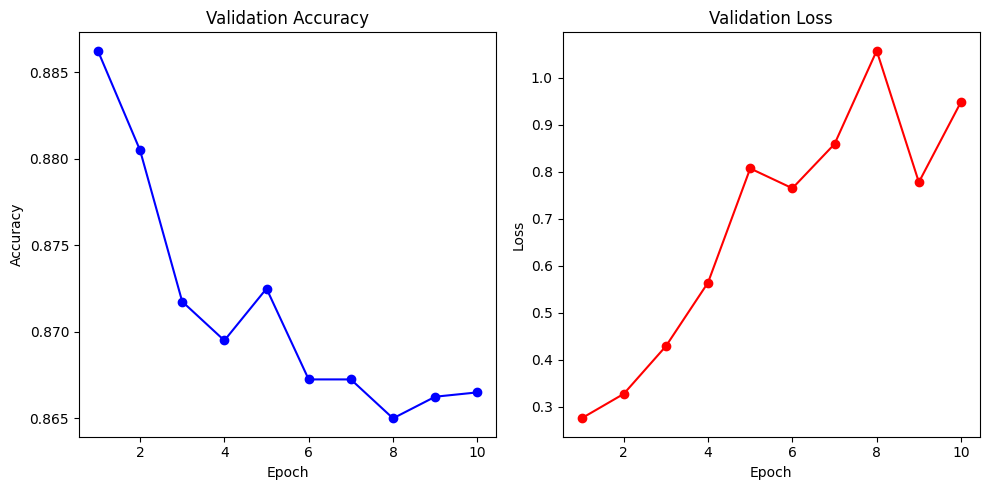

In [17]:
# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), val_accuracies, marker='o', color='b')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), val_losses, marker='o', color='r')
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()


# 6. Compute the number of parameters again

In [18]:
model = torch.load("checkpoint.pt")

pytorch_total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters in the model: {pytorch_total_params / 1e6:.2f}M")

C:\Users\JENIL\AppData\Local\Temp\ipykernel_15604\1656821408.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("checkpoint.pt")


Total parameters in the model: 5.29M


## Dynamic Quantization with INT4 or INT8

In [19]:
import torch
import torch.quantization as tq

model = torch.load("checkpoint.pt", weights_only=False)


# Apply dynamic quantization (use INT8)
model_dynamic = tq.quantize_dynamic(
    model,  # Original model
    {nn.Linear},  # Apply quantization to linear layers only
    dtype=torch.qint8  # Use INT8 quantization
)

# Verify the quantized model architecture
print(model_dynamic)

# Save the quantized model if needed
torch.save(model_dynamic, "quantized_model_int8.pt")


MLP(
  (net): Sequential(
    (0): DynamicQuantizedLinear(in_features=10000, out_features=512, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): DynamicQuantizedLinear(in_features=512, out_features=256, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): DynamicQuantizedLinear(in_features=256, out_features=128, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): DynamicQuantizedLinear(in_features=128, out_features=64, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): DynamicQuantizedLinear(in_features=64, out_features=2, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  )
)


## Half precision 

In [20]:
# Convert the model to half precision (FP16)
model = torch.load("checkpoint.pt", weights_only=False)
model_half = model.half()

# Verify the model is now in half precision
print(model_half)

# Save the model in half precision
torch.save(model_half, "half_precision_model.pt")


MLP(
  (net): Sequential(
    (0): Linear(in_features=10000, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=128, out_features=64, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=64, out_features=2, bias=True)
  )
)


In [21]:
import torch
import pandas as pd
import time
import os

def get_model_size_mb(path):
    size_bytes = os.path.getsize(path)
    size_mb = size_bytes / (1024 * 1024)
    return round(size_mb, 2)


def evaluate_model(model, loader, model_type="original"):
    model.eval().cpu()
    
    # Handle half-precision model
    if model_type == "half":
        model = model.half()

    correct, total = 0, 0
    total_time = 0

    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.cpu()
            yb = yb.cpu()

            if model_type == "half":
                xb = xb.half()
            elif model_type == "quantized":
                # dynamic quantized models usually accept float32 input (quantization happens inside)
                xb = xb.float()

            start = time.time()
            out = model(xb)
            end = time.time()

            pred = out.argmax(1)
            correct += (pred == yb).sum().item()
            total += yb.size(0)
            total_time += (end - start)

    acc = 100 * correct / total
    avg_time = (total_time * 1000) / total  # ms/sample
    return acc, avg_time


# Model architecture params
input_dim = 10000
hidden_sizes = [512, 256, 128, 64]
output_dim = 2

# Initialize and load original model
model = torch.load("checkpoint.pt", weights_only=False, map_location="cpu")

# Initialize and load quantized model (must stay on CPU)
model_dynamic = torch.load("quantized_model_int8.pt", weights_only=False, map_location="cpu")

# Initialize and load half precision model
model_half = MLP(input_dim, hidden_sizes, output_dim).half()  # half precision
model_half = torch.load("half_precision_model.pt", weights_only=False, map_location="cpu")

print("Models loaded")


acc_orig, time_orig = evaluate_model(model, val_loader, model_type="original")
acc_quant, time_quant = evaluate_model(model_dynamic, val_loader, model_type="quantized")
acc_half, time_half = evaluate_model(model_half, val_loader, model_type="half")

# Create a DataFrame structure
results_df = pd.DataFrame({
    "S.I.": [1, 2, 3],
    "Model Name": ["Original", "Dynamic", "Half"],
    "Accuracy (Out of 100)": [acc_orig, acc_quant, acc_half],
    "Storage (In MB)": [get_model_size_mb("checkpoint.pt"), get_model_size_mb("quantized_model_int8.pt"), get_model_size_mb("half_precision_model.pt")],
    "Inference time (In ms)": [time_orig, time_quant, time_half]
})

# Display the table
results_df


c:\Users\JENIL\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\_utils.py:392: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  device=storage.device,


Models loaded


,S.I.,Model Name,Accuracy (Out of 100),Storage (In MB),Inference time (In ms)
0,1,Original,88.625,20.20,0.090892
1,2,Dynamic,88.725,5.06,0.068727
2,3,Half,88.625,10.10,9.677914
